# Lab 3
### Averaging Filters

http://scikit-image.org/docs/0.13.x/api/skimage.util.html#skimage.util.random_noise

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.median

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gaussian

In [2]:
import skimage.io as io
from skimage.filters import median
from skimage.filters import gaussian
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray
from scipy import fftpack
from scipy.signal import convolve2d
from skimage.util import random_noise
from skimage.exposure import rescale_intensity
from commonfunctions import *
import math

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [24]:
'''
(1) Your own median filter algorithm
'''
def median_filter (image,filter_dim = 3):
    image_width = image.shape[0]
    image_height = image.shape[1]
    edge_x = filter_dim//2
    edge_y = filter_dim//2
    


    out_image = np.zeros(image.shape)
    for i in range (edge_x, image_width-edge_x):
        for j in range (edge_y, image_height-edge_y):
            out_image[i,j] = np.median(image[i:i+filter_dim,j:j+filter_dim])

    
    return(out_image)
   
    

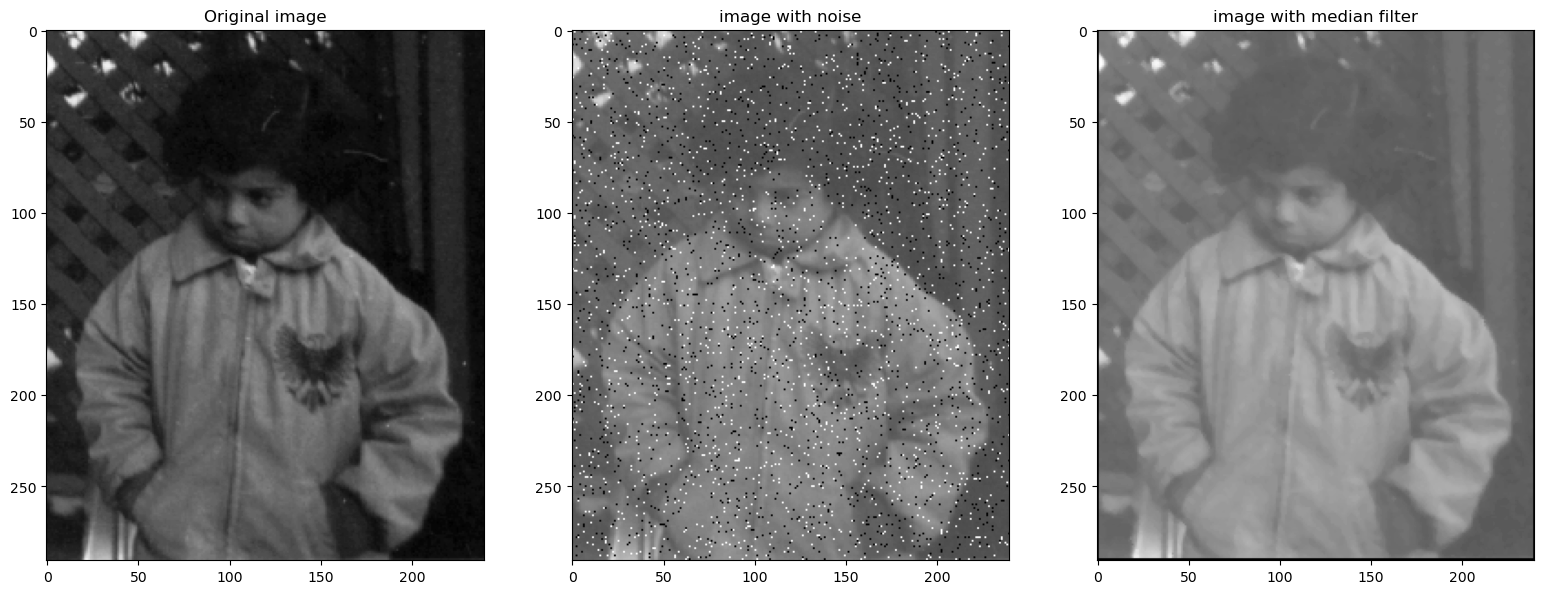

In [25]:
from commonfunctions import show_images



img = io.imread("./pout.tif",as_gray=True)

noise_img = random_noise(img, mode = 's&p', amount = 0.05)
img_with_median_filter = median_filter(noise_img)
show_images([img,noise_img,img_with_median_filter],["Original image", "image with noise","image with median filter"])
# showHist(img)
# showHist(noise_img*255)
# showHist(img_with_median_filter*255)

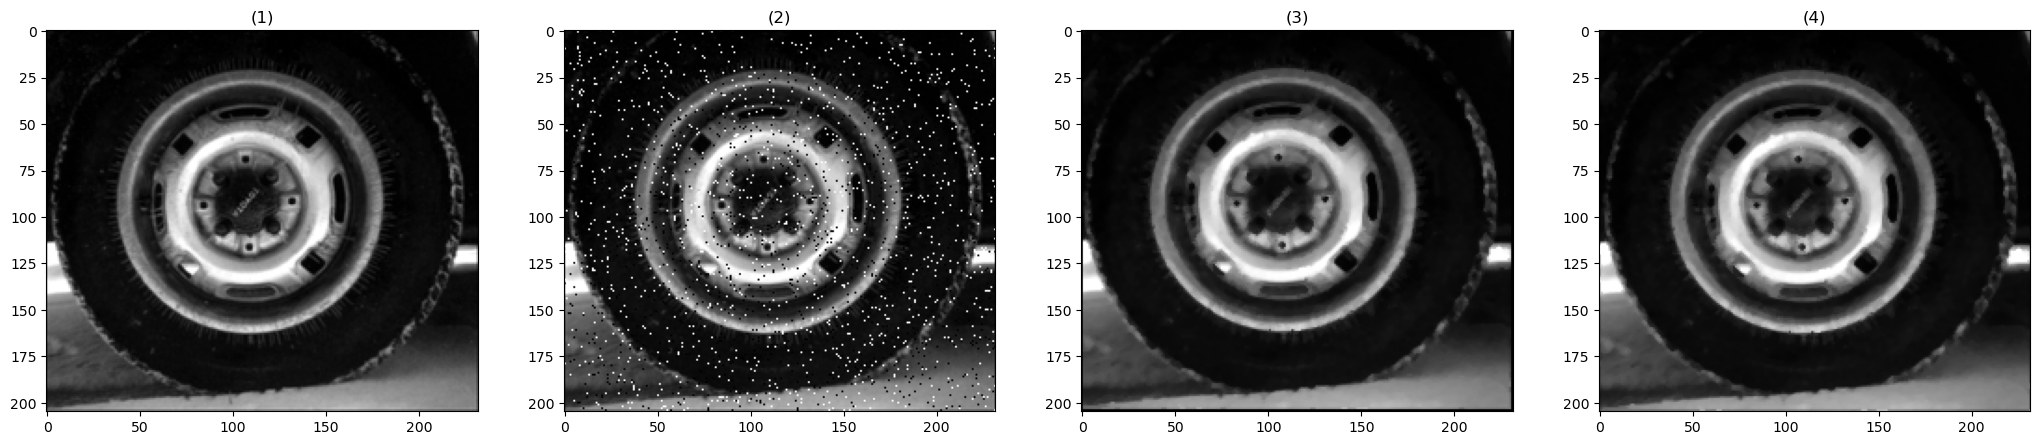

In [5]:
'''
(2) skimage median filter
'''

skimage_median_filter = median(noise_img)

show_images([img,noise_img,img_with_median_filter,skimage_median_filter])

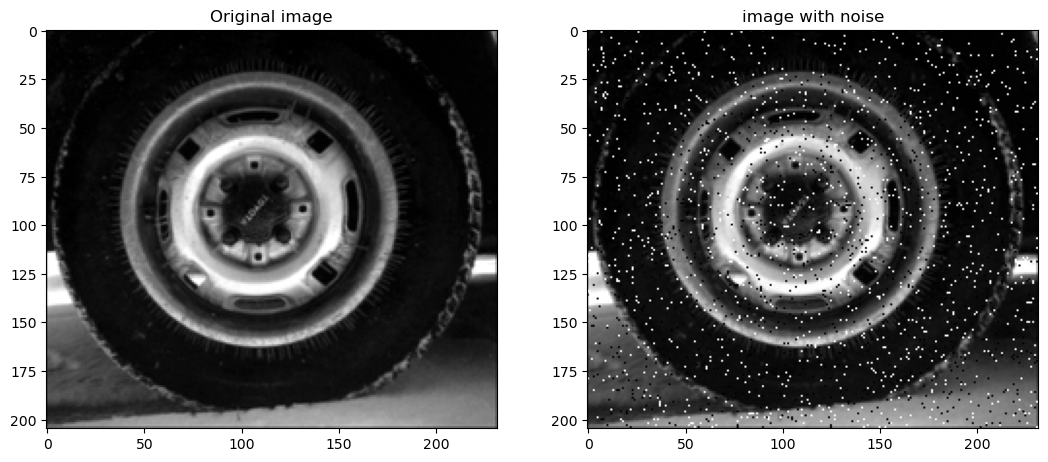

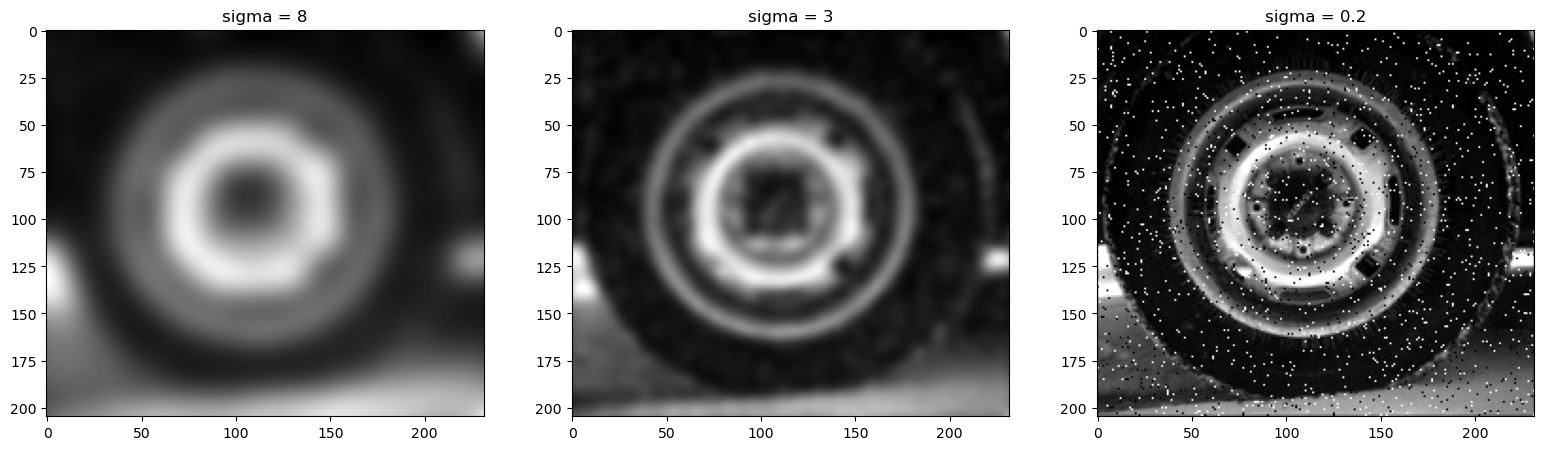

In [6]:
'''
(3) Gaussion Filters
'''
sigma_8 = gaussian(noise_img,sigma =8)
sigma_3 = gaussian(noise_img,sigma =3)
sigma_0_2 = gaussian(noise_img,sigma =0.2)
show_images([img,noise_img],["Original image", "image with noise"])
show_images([sigma_8,sigma_3,sigma_0_2],["sigma = 8","sigma = 3","sigma = 0.2"])